In [1]:
import keras
import matplotlib.pyplot as plt #This package is for plotting
%matplotlib inline  
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.initializers import RandomNormal
from keras.models import load_model

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
x_train = np.reshape(X_train,[-1, 28*28])
x_test = np.reshape(X_test,[-1, 28*28])
x_train = x_train/np.max(x_train)
x_test = x_test/np.max(x_test)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Dense(512, input_dim=784, init='uniform'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(512, init='uniform'))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dense(10, init='uniform'))
model.add(keras.layers.Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

/Users/johnminer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=784, kernel_initializer="uniform")`
  
/Users/johnminer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/johnminer/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="uniform")`
  


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


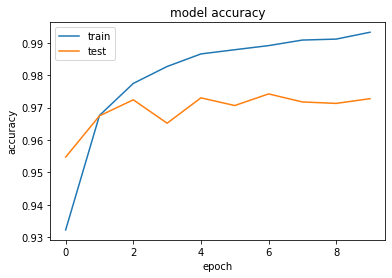

In [4]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=10, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
from keras.callbacks import TensorBoard

tensor_board = TensorBoard(log_dir='./Graph')

model.fit(x_train, y_train, verbose=1, callbacks=[tensor_board])

AttributeError: 'Sequential' object has no attribute '_get_distribution_strategy'

In [6]:
# Option 1: Save Weights + Architecture
from keras.models import model_from_json
model.save_weights('model_weights.h5')
with open('model_architecture.json', 'w') as f:
    f.write(model.to_json())
# Option 1: Load Weights + Architecture
with open('model_architecture.json', 'r') as f:
    new_model_1 = model_from_json(f.read())
new_model_1.load_weights('model_weights.h5')

In [7]:
from keras.models import load_model

# Option 2: Save/load the entire model

# Creates a HDF5 file 'my_model.h5'
model.save('my_model.h5')

# Deletes the existing model
del model  

# Returns a compiled model identical to the previous one
model = load_model('my_model.h5')

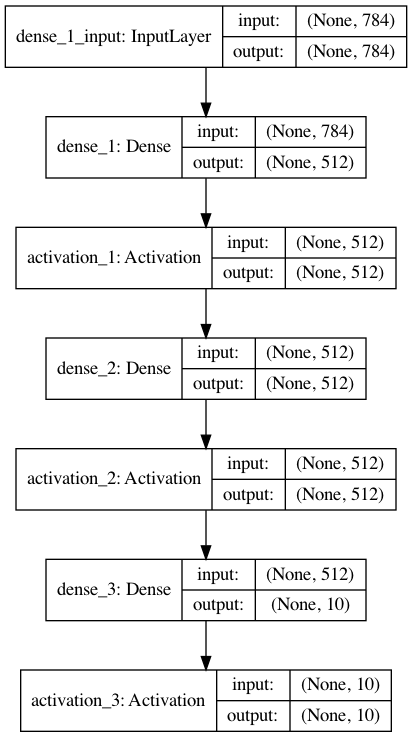

In [8]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)